## Problem Set 3

**Exercise 5.1** If the individual lives for one period $T = 1$, what is the condition that characterizes the optimal amount of cake to eat in period 1? Write the problem in the equivalent way of showing what the condition is for the optimal amount of cake to save for the next period $W_{T+1}$ or $W_2$.

**Solution:**
$$ V_1(W_1) = \quad \max_{W_2 \in [0, W_1]} \: u(W_1 - W_2) $$
As the individual only lives for one period, there is no point saving for the next period. 
<br> Therefore $ W_2 = \psi_1(W_1) = 0 $,   $ V_1(W_1) = u(W_1) $

**Exercise 5.2** If the individual lives for two periods $T = 2$, what is the condition that characterizes the optimal amount of cake to leave for the next period $W_3$ in period 2? What is the condition that characterizes the optimal amount of cake leave for the next period $W_2$ in period 1?

**Solution:**
<br> The condition that characterizes the optimal amount of cake to leave for the next period $W_3$:
$$ \max_{W_3 \in [0, W_2]} \: u(W_2 - W_3) $$
<br> As solved above, $ W_3 = 0 $.
<br> The condition that characterizes the optimal amount of cake leave for the next period $W_2$:
$$ V_1(W_1) = \quad \max_{W_2 \in [0, W_1]} \: u(W_1 - W_2) + \beta u(W_2) $$
Taking derivative of the above function with respect to $ W_2 $, we get:
<br> $ u'(W_1 - W_2) = \beta u'(W_2) $（with respect to $ W_2 $).
<br> We can write this as $ W_2 = \psi_1(W_1) $

**Exercise 5.3** If the individual lives for three periods $ T = 3 $, what are the conditions that characterize the optimal amount of cake to leave for the next period in each period $ \{W_2, W_3, W_4\} $? Now assume that the initial cake size is $ W_1 = 1 $, the discount factor is $ \beta = 0.9 $, and the period utility function is $ \ln(c_t) $. Show how $ \{c_t\}_{t=1}^3 $ and $ \{W_t\}_{t=1}^4 $ evolve over the three periods.

**Solution:**
<br> For period 3, $ W_4 = 0 $,  $ c_3 = W_3 - W_4 = W_3 $. 
<br> For period 2, we know from the above solution that $ u'(W_2 - W_3) = \beta u'(W_3) $ （with respect to $ W_3 $).
<br> For period 1, we need to maximize the equation w.r.t. $W_2$:
$$ u(W_1 - W_2) + \beta u(W_2 - W_3) + \beta^2 u(W_3) $$ 
Taking derivative of the above function with respect to $ W_2 $, we get:
<br> $ u'(W_1 - W_2) = \beta u'(W_2 - W_3) $

In [6]:
# Solving the functions
import sympy as sy
w1 = 1.0
w2 = sy.symbols('w2')
w3 = sy.symbols('w3')
beta = 0.9
sol = sy.solve([sy.log(w2 - w3).diff(w3) + beta*sy.log(w3).diff(w3),
      sy.log(w1 - w2).diff(w2) + beta*sy.log(w2 - w3).diff(w2)], dict=True)
c1 = w1 - sol[0][w2]
c2 = sol[0][w2] - sol[0][w3]

In [7]:
dic_c = {'c1':c1, 'c2':c2, 'c3':sol[0][w3]}
dic_w = {'W1':w1, 'W2':sol[0][w2], 'W3':sol[0][w3], 'W4':0}
print(dic_c)
print(dic_w)

{'c1': 0.369003690036900, 'c2': 0.332103321033210, 'c3': 0.298892988929889}
{'W1': 1.0, 'W2': 0.630996309963100, 'W3': 0.298892988929889, 'W4': 0}


Text(0,0.5,'W')

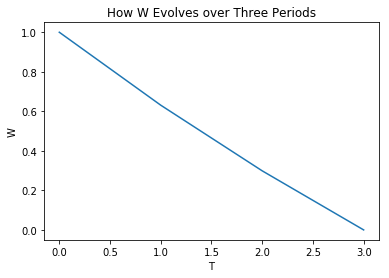

In [10]:
import matplotlib.pyplot as plt
T = [0, 1, 2, 3]
W = [dic_w['W1'], dic_w['W2'], dic_w['W3'], dic_w['W4']]
C = [dic_c['c1'], dic_c['c2'], dic_c['c3']]
plt.plot(T, W)
plt.title('How W Evolves over Three Periods')
plt.xlabel('T')
plt.ylabel('W')

Text(0,0.5,'C')

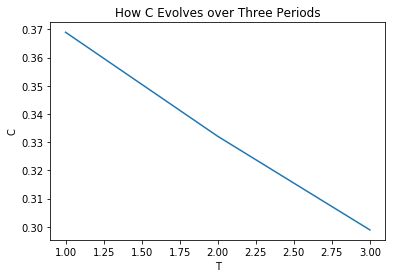

In [12]:
plt.plot(T[1:], C)
plt.title('How C Evolves over Three Periods')
plt.xlabel('T')
plt.ylabel('C')

**Excercise 5.4** Using the envelope theorem that says $ W_{T+1} $ will be chosen optimally in the next period, show the condition that characterizes the optimal choice (the policy function) in period $ T − 1 $ for $ W_T = \psi_{T−1}(W_{T−1}) $. Show the value function $ V_{T−1} $ in terms of $ \psi_{T−1}(W_{T−1}) $.

**Solution:**
<br> The condition that characterizes the optimal choice:
$$ u'(W_{T-1} - \psi_{T−1}(W_{T−1})) = \beta u'(\psi_{T−1}(W_{T−1})) \ w.r.t. W_T $$
<br> The value function:
$$ V_{T-1}(W_{T-1}) \equiv \max_{\psi_{T−1}(W_{T−1})} \: u(W_{T-1} - \psi_{T−1}(W_{T−1})) + \beta V_T(\psi_{T−1}(W_{T−1})) $$

**Excercise 5.5** Let $ u(c) = \ln(c) $. Show that $ V_{T−1}(\bar{W}) $ does not equal $ V_T(\bar{W}) $ and that $ \psi_{T−1}(\bar{W}) $ does not equal $ \psi_T(\bar{W}) $ for a cake size of $ \bar{W} $ when $ T < \infty $ represents the last period of an individual’s life.

**Solution:**
<br> As $ W_{T+1} = \psi_{T}(\bar{W}) = 0 $, if $ \psi_{T}(\bar{W}) = \psi_{T-1}(\bar{W}) $, then $ \psi_{T-1}(\bar{W}) = W_{T} = 0 $. 
<br> As $ u'(W_{T-1} - W_T) = \beta u'(W_T) $, we know $ (1 + \beta) W_T = \beta W_{T-1} $. 
<br> If $ W_{T} = 0 $, then $ W_{T-1} = 0 $. 
<br> Following the same logic, it can be shown that $ W_{T-2}, ... , W_1 $ all equal to 0, which obviously contradicts with the known conditions. 
<br> Therefore $ \psi_{T}(\bar{W}) $ does not equal $ \psi_{T-1}(\bar{W}) $.

As $ V_T(\bar{W}) = u(\bar{W}) = \ln(\bar{W}) $, if $ V_T(\bar{W}) = V_{T-1}(\bar{W}) $, then we have $ V_{T-1}(\bar{W}) = \ln(\bar{W} - W_T) + \beta \ln(W_T) = \ln(\bar{W}) $
<br> From the optimal condition we know, $ u'(\bar{W} - W_T) = \beta u'(W_T) $.
<br> Solving the two equations, we have $ (1 - \frac{W_T}{\bar{W}})(W_T)^\beta = (1 - \frac{\beta}{(\beta+1)})(W_T)^\beta = 1 $. 
<br> If this holds, then $ (W_T)^\beta = \beta + 1 $. As $\beta$ is larger than 0, this means that $ (W_T)^\beta $ is greater than 1, which contradicts with the known conditions.
<br> Therefore, $ V_T(\bar{W}) $ cannot be equal to $ V_{T-1}(\bar{W}) $

**Excercise 5.6** Using $ u(c) = \ln(c) $, write the finite horizon Bellman equation for the value function at time $ T−2 $. Characterize the solution for the period $ T−2 $ policy function for how much cake to save for the next period $ W_{T−1} = \psi_{T−2}(W_{T−2}) $ using the envelope theorem (the principle of optimality) and write its analytical solution. Also, write the analytical solution for $ V_{T−2} $.

**Solution:**
<br> In period $ T-2 $, $ u'(W_{T-1} - W_T) = \beta u'(W_T) $. So
$$ W_T = \frac{\beta}{1+\beta}W_{T-1} $$
<br> Therefore the Bellman equation is:
$$ V_{T-2}(W_{T-2}) = \quad \max_{W_{T-1}} \: \ln(W_{T-2} - W_{T-1}) + \beta \ln(\frac{W_{T-1}}{1+\beta}) + \beta^2 \ln(\frac{\beta W_{T-1}}{1+\beta}) $$
<br> Taking derivative of the above function w.r.t. $ W_{T-1} $:
$$ W_{T-1} = \frac{\beta + \beta^2}{1 + \beta + \beta^2} W_{T-2} $$
<br> So the analytical solution for $V_{T-2}$ is:
$$ V_{T-2}(W_{T-2}) = \ln(\frac{W_{T-2}}{1+\beta+\beta^2}) + \beta \ln(\frac{\beta W_{T-2}}{1+\beta+\beta^2}) + \beta^2 \ln(\frac{\beta^2 W_{T-2}}{1+\beta+\beta^2}) $$

**Excercise 5.7** Using $ u(c) = \ln(c) $ and the answers to Exercises 5.5 and 5.6, write down the expressions for the analytical solutions for $ \psi_{T−s}(W_{T−s}) $ and $ V_{T−s}(W_{T−s}) $ for the general integer $ s ≥ 1 $ using induction. Show that $ lim_{s→\infty} V_{T−s}(W_{T−s}) = V(W_{T−s}) $ and that $ lim_{s→\infty} \psi_{T−s}(W_{T−s}) = \psi(W_{T−s}) $. That is, as the horizon becomes further and further away (infinite), the value function and policy function become independent of time. Another way of saying this is the following. The value of entering a period $t$ with a certain amount of cake when the end of your life is far enough away only depends on how much cake there is $W_t$, not in what period you have that amount of cake.

**Solution:**
$$ \psi_{T-s}(W_{T-s}) = W_{T-s+1} = \frac{\sum_{i=1}^{s} \beta^i}{1 + \sum_{i=1}^{s} \beta^i} W_{T-s} $$
<br>
$$ V_{T-s}(W_{T-s}) = \sum_{i=0}^{s} \beta^i \ln(\frac{\beta^i W_{T-s}}{1 + \sum_{i=1}^{s} \beta^i}) $$
<br>
<br> So
$$ \lim\limits_{s \to \infty} \psi_{T-s}(W_{T-s}) = \beta W_{T-s} = \psi(W_{T-s}) $$
<br>
$$ \lim\limits_{s \to \infty} V_{T-s}(W_{T-s}) = (\frac{1}{1-\beta}) \ln((1-\beta)W_{T-s}) + \frac{\beta}{(1-\beta)^2} \ln(\beta) = V(W_{T-s}) $$

**Excercise 5.8** Write the Bellman equation for the cake eating problem with a general utility function $ u(c) $ when the horizon is infinite (i.e., either $ T = \infty $ or $ s = \infty $).

**Solution:**
<br> Let $W'$ represent the cake left tomorrow. $ W' \in [0, W] $
$$ V(W) = \max_{W'} \: u(W - W') + \beta V(W') $$

**Excercise 5.9** Let the maximum size of the cake be $ W_{max} = 1 $. Approximate the continuum of possible cake sizes by a column vector called $W$ that ranges between a number very close to 0 to 1. Let the number of possible cake values be $ N = 100 $ so that the increment between each value is 0.01. So $ W_{min} = 0.01 $.

In [116]:
import numpy as np
w_lb = 1e-2
w_ub = 1.0
N = 100
w_vec = np.linspace(w_lb, w_ub, N)
print(w_vec)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99 1.  ]


**Excercise 5.10** As in the previous problem sets, assume that period $ T $ is the final period of an individual’s life. So $ V_{T+1}(W′) $ for entering period $ T+1 $ with a cake of size $ W′ $ is a column vector of zeros of length $N$, where $ V_{T+1}: \mathbb{R}^N → \mathbb{R}^N $ and $ W, W′ \in [W_{min}, W_{max}] $. Assume that the period utility function has the logarithmic functional form $ u(c) = \ln(c) $, and that the discount factor is $ \beta = 0.9 $. What is the resulting policy function $ W′ = \psi_T(W) $ and value function $ V_T(W) $ when $ V_T $ is defined as the contraction in equations (5.9) and (5.10)?

In [117]:
# utility function
def utility(c):
    util = np.log(c)
    return util

In [118]:
beta = 0.9
w = np.tile(w_vec.reshape((N, 1)), (1, N))
w_prime = np.tile(w_vec.reshape((1, N)), (N, 1))
c_mat = w - w_prime
c_pos = c_mat > 0
c_mat[~c_pos] = 1e-7
u_mat = utility(c_mat)
v_prime = np.zeros(N).reshape((N, 1))
vt_w = u_mat + beta * v_prime
v_vec = vt_w.max(axis=1)
index = np.argmax(vt_w, axis=1)
w_prime_opt = w_vec[index]

Text(0,0.5,"W'")

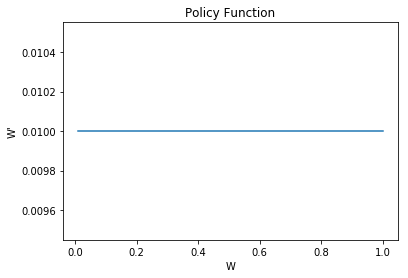

In [119]:
plt.plot(w_vec, w_prime_opt)
plt.title('Policy Function')
plt.xlabel('W')
plt.ylabel("W'")

Text(0,0.5,'V')

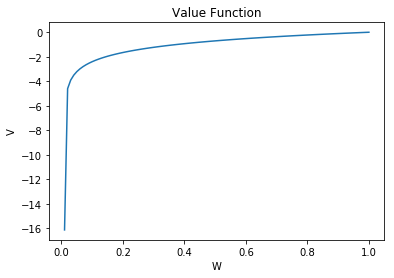

In [120]:
plt.plot(w_vec, v_vec)
plt.title('Value Function')
plt.xlabel('W')
plt.ylabel("V")

**Exercise 5.11** Generate a norm $ \delta_T = \lVert V_T(W) − V_{T+1}(W') \rVert $ that measures the distance between the two value functions. Define the distance metric as the sum of the squared differences, 
$$ \delta_T \equiv \lVert V_T(W) − V_{T+1}(W') \rVert = (V_T − V_{T+1})' \times (V_T − V_{T+1}) $$
where $ (V_T − V_{T+1})' $ is the transpose of the difference of the two vectors. Defined in this way, $ \delta_T \in \mathbb{R}_+ $.

In [121]:
v_init = utility(w_vec)
dis = sum((v_init - v_vec)**2)
print('Distance =', dis)

Distance = 133.5146419730059


**Excercise 5.12** Take the resulting $V_T$ from Exercise 5.10, and perform the same contraction on it to generate $V_{T−1}$ and $\psi_{T−1}$. That is, generate,
$$ V_{T−1}(W) = C(V_T(W)) = \max_{W' \in [0, W]} u(W − W') + \beta V_T(W') $$
and the accompanying policy function $ W' = \psi_{T−1}(W) $. Calculate the accompanying distance measure for $ \delta_{T−1} $ using the formula from (5.13) with the updated period subscripts. Compare $ \delta_{T−1} $ with $ \delta_{T} $ from Exercise 5.11.

In [122]:
v_prime = np.tile(v_vec.reshape((1, N)), (N, 1))
v_prime[~c_pos] = -9e+5
v_w_1 = u_mat + beta * v_prime
v_max_1 = v_w_1.max(axis=1)
index = np.argmax(v_w_1, axis=1)
w_prime_opt = w_vec[index]

Text(0,0.5,"W'")

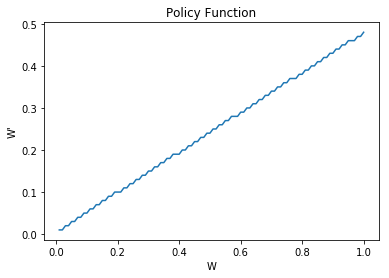

In [123]:
plt.plot(w_vec, w_prime_opt)
plt.title('Policy Function')
plt.xlabel('W')
plt.ylabel("W'")

Text(0,0.5,'V')

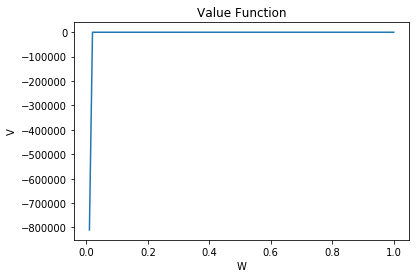

In [124]:
plt.plot(w_vec, v_max_1)
plt.title('Value Function')
plt.xlabel('W')
plt.ylabel("V")

**Exercise 5.13** Repeat Exercise 5.12 and generate $V_{T−2}$ and $\psi_{T−2}$ by performing the contraction on $V_{T−1}$. Compare $\delta_{T−2}$ to $\delta_{T−1}$ and $\delta_T$.

In [125]:
v_prime = np.tile(v_max_1.reshape((1, N)), (N, 1))
v_prime[~c_pos] = -9e+5
v_w_2 = u_mat + beta * v_prime
v_max_2 = v_w_2.max(axis=1)
index = np.argmax(v_w_2, axis=1)
w_prime_opt = w_vec[index]

In [127]:
dis_1 = sum((v_init - v_vec)**2)
dis_2 = sum((v_max_1 - v_vec)**2)
dis_3 = sum((v_max_2 - v_max_1)**2)
print('Distance at T =', dis_1)
print('Distance at T-1 =', dis_2)
print('Distance at T-2 =', dis_3)

Distance at T = 133.5146419730059
Distance at T-1 = 656100000726.7604
Distance at T-2 = 531441000766.63196


Text(0,0.5,"W'")

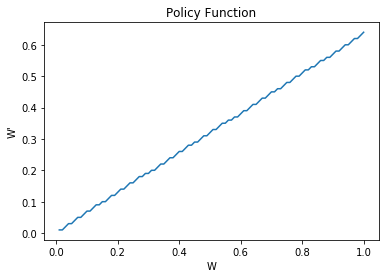

In [128]:
plt.plot(w_vec, w_prime_opt)
plt.title('Policy Function')
plt.xlabel('W')
plt.ylabel("W'")

Text(0,0.5,'V')

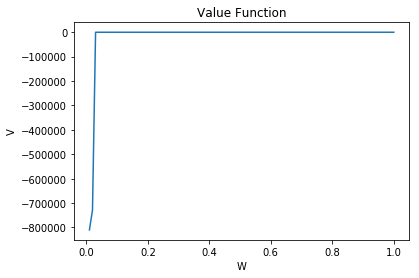

In [129]:
plt.plot(w_vec, v_max_2)
plt.title('Value Function')
plt.xlabel('W')
plt.ylabel("V")

**Exercise 5.14** Write a while loop in Python that performs the contraction operation from Exercises 5.10, 5.12, and 5.13 iteratively until the distance measure is very small $ \delta_{T−s} < 10^−9 $ . How many iterations did it take $ (s + 1) $? Congratulations, you’ve just completed your first solution by value function iteration. The distance measure $ \delta_{T−s} $ being arbitrarily close to zero means you have converged to the fixed point $V_t = V_{t−1} = V $. (For fun, you can show that the policy function converges to the same function regardless of what you put in for your initial policy function value.)

In [130]:
maxiters = 500
toler = 1e-10
dist = 10.0
vf_iter = 0
while dist > toler and vf_iter < maxiters:
    vf_iter += 1
    # one contraction mapping
    v_prime = np.tile(v_init.reshape((1, N)), (N, 1))
    v_prime[~c_pos] = -9e+4
    v_new = (u_mat + beta * v_prime).max(axis=1)
    dist = ((v_new - v_init) ** 2).sum()
    print('Iteration =', vf_iter, ', distance =', dist)
    v_init = v_new

print("It takes %d iterations to converge" % vf_iter)

Iteration = 1 , distance = 6562865744.5285635
Iteration = 2 , distance = 5315921432.356884
Iteration = 3 , distance = 4305896471.418966
Iteration = 4 , distance = 3487776216.5675955
Iteration = 5 , distance = 2825098788.019544
Iteration = 6 , distance = 2288330056.357764
Iteration = 7 , distance = 1853547373.8090138
Iteration = 8 , distance = 1501373394.0455368
Iteration = 9 , distance = 1216112465.4304204
Iteration = 10 , distance = 985051109.6286845
Iteration = 11 , distance = 797891408.7166361
Iteration = 12 , distance = 646292049.0098146
Iteration = 13 , distance = 523496566.09326845
Iteration = 14 , distance = 424032223.8060949
Iteration = 15 , distance = 343466105.6810028
Iteration = 16 , distance = 278207549.28964245
Iteration = 17 , distance = 225348118.14783967
Iteration = 18 , distance = 182531978.5237014
Iteration = 19 , distance = 147850905.07819986
Iteration = 20 , distance = 119759235.2952075
Iteration = 21 , distance = 97004982.62446027
Iteration = 22 , distance = 785740

**Exercise 5.15** Using the matplotlib library, plot the policy function for the converged problem $ W' = \psi_{T−s}(W) = \psi(W) $ which gives the value of the cake tomorrow (y-axis) as a function of the cake today (x-axis).

Text(0,0.5,"W'")

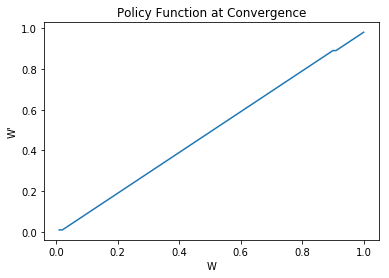

In [131]:
index = np.argmax(u_mat + beta * v_prime, axis=1)
w_prime_opt = w_vec[index]
plt.plot(w_vec, w_prime_opt)
plt.title('Policy Function at Convergence')
plt.xlabel('W')
plt.ylabel("W'")

**Exercise 5.16**

In [132]:
import scipy.stats as sts
sigma = np.sqrt(0.25)
mean = 4 * sigma
e_max = mean + 3 * sigma
e_min = mean - 3 * sigma
M = 7
e_vec = np.linspace(e_min, e_max, M)
f = sts.norm.pdf(e_vec, loc = mean, scale = sigma)

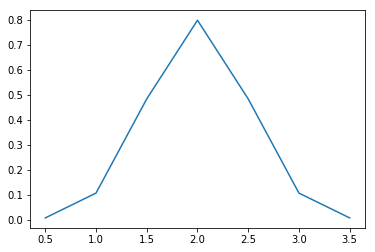

In [133]:
plt.plot(e_vec, f)

**Excercise 5.17**

In [151]:
mat_shock = np.array([u_mat*e for e in e_vec])
v_init = np.zeros((N, M))
v_exp = v_init @ f.reshape((M,1))
v_exp_mat = np.tile(v_exp.reshape((1, N)), (N, 1))
v_exp_mat[~c_pos] = -9e+5
v_exp_c = np.array([v_exp_mat for i in range(M)])
v_t = mat_shock + beta * v_exp_c
v_new = np.zeros((N, M))
w_prime = np.zeros((N, M))

In [152]:
for i in range(N):
    v_w = v_t[:, i, :]
    v_new[i] = v_w.max(axis=1)
    index = np.argmax(v_w, axis=1)
    w_prime[i] = w_vec[index]

Text(0,0.5,"W'")

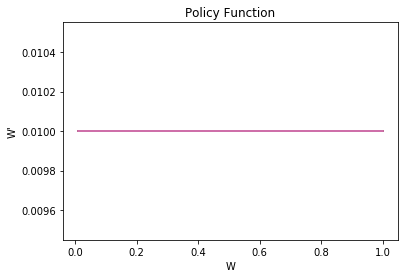

In [153]:
plt.plot(w_vec, w_prime)
plt.title('Policy Function')
plt.xlabel('W')
plt.ylabel("W'")

Text(0,0.5,'V')

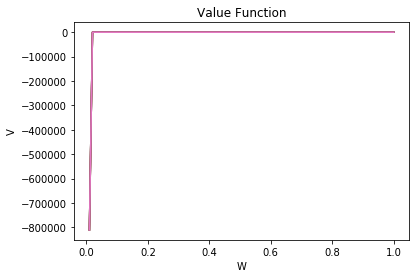

In [154]:
plt.plot(w_vec, v_new)
plt.title('Value Function')
plt.xlabel('W')
plt.ylabel("V")

**Excercise 5.18**

In [157]:
dis_1 = sum((v_init - v_new)**2).sum()
print('Distance at T =', dis_1)

Distance at T = 4593065573764.531


**Excercise 5.19**

In [159]:
v_init = v_new
v_exp = v_init @ f.reshape((M,1))
v_exp_mat = np.tile(v_exp.reshape((1, N)), (N, 1))
v_exp_mat[~c_pos] = -9e+5
v_exp_c = np.array([v_exp_mat for i in range(M)])
v_t = mat_shock + beta * v_exp_c
v_new_1 = np.zeros((N, M))
w_prime_1 = np.zeros((N, M))

In [160]:
for i in range(N):
    v_w = v_t[:, i, :]
    v_new_1[i] = v_w.max(axis=1)
    index = np.argmax(v_w, axis=1)
    w_prime_1[i] = w_vec[index]

In [166]:
dis_2 = sum((v_new_1 - v_new)**2).sum()
print('Distance at T =', dis_1)
print('Distance at T-1 =', dis_2)

Distance at T = 4593065573764.531
Distance at T-1 = 4592961157486.451


Text(0,0.5,"W'")

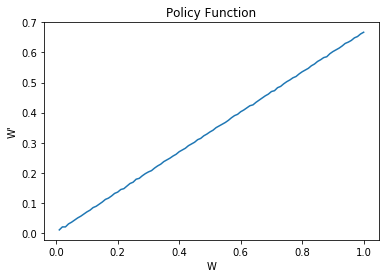

In [163]:
plt.plot(w_vec, np.average(w_prime_1, axis=1))
plt.title('Policy Function')
plt.xlabel('W')
plt.ylabel("W'")

Text(0,0.5,'V')

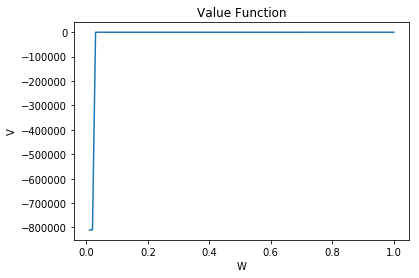

In [165]:
plt.plot(w_vec, np.average(v_new_1, axis=1))
plt.title('Value Function')
plt.xlabel('W')
plt.ylabel("V")

**Excercise 5.20**

In [168]:
v_init = v_new_1
v_exp = v_init @ f.reshape((M,1))
v_exp_mat = np.tile(v_exp.reshape((1, N)), (N, 1))
v_exp_mat[~c_pos] = -9e+5
v_exp_c = np.array([v_exp_mat for i in range(M)])
v_t = mat_shock + beta * v_exp_c
v_new_2 = np.zeros((N, M))
w_prime_2 = np.zeros((N, M))

In [169]:
for i in range(N):
    v_w = v_t[:, i, :]
    v_new_2[i] = v_w.max(axis=1)
    index = np.argmax(v_w, axis=1)
    w_prime_2[i] = w_vec[index]

In [172]:
dis_3 = sum((v_new_1 - v_new_2)**2).sum()
print('Distance at T =', dis_1)
print('Distance at T-1 =', dis_2)
print('Distance at T-2 =', dis_3)

Distance at T = 4593065573764.531
Distance at T-1 = 4592961157486.451
Distance at T-2 = 4592773318902.618


Text(0,0.5,"W'")

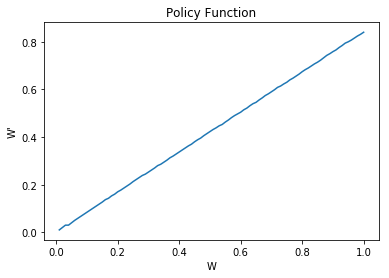

In [170]:
plt.plot(w_vec, np.average(w_prime_2, axis=1))
plt.title('Policy Function')
plt.xlabel('W')
plt.ylabel("W'")

Text(0,0.5,'V')

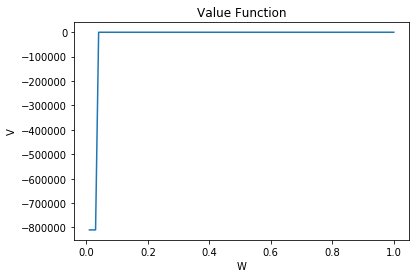

In [171]:
plt.plot(w_vec, np.average(v_new_2, axis=1))
plt.title('Value Function')
plt.xlabel('W')
plt.ylabel("V")

**Excercise 5.21**

In [173]:
maxiters = 500
toler = 1e-10
dist = 10.0
vf_iter = 0
v_init = np.zeros((N, M))
while dist > toler and vf_iter < maxiters:
    vf_iter += 1
    # one contraction mapping
    v_exp = v_init @ f.reshape((M,1))
    v_exp_mat = np.tile(v_exp.reshape((1, N)), (N, 1))
    v_exp_mat[~c_pos] = -9e+5
    v_exp_c = np.array([v_exp_mat for i in range(M)])
    v_t = mat_shock + beta * v_exp_c
    v_new = np.zeros((N, M))
    w_prime = np.zeros((N, M))
    for i in range(N):
        v_w = v_t[:, i, :]
        v_new[i] = v_w.max(axis=1)
        index = np.argmax(v_w, axis=1)
        w_prime[i] = w_vec[index]
    dist = np.sum((v_new - v_init) ** 2)
    print('Iteration =', vf_iter, ', distance =', dist)
    v_init = v_new

print("It takes %d iterations to converge" % vf_iter)

Iteration = 1 , distance = 4593065573764.532
Iteration = 2 , distance = 4592961157486.45
Iteration = 3 , distance = 4592773318902.618
Iteration = 4 , distance = 4592435482535.178
Iteration = 5 , distance = 4591828122045.414
Iteration = 6 , distance = 4590737027866.801
Iteration = 7 , distance = 4588779564036.384
Iteration = 8 , distance = 4585276341683.944
Iteration = 9 , distance = 4579034452075.419
Iteration = 10 , distance = 4568002737224.081
Iteration = 11 , distance = 4548798022934.695
Iteration = 12 , distance = 4516325212537.756
Iteration = 13 , distance = 4464617037466.98
Iteration = 14 , distance = 4393256357576.2373
Iteration = 15 , distance = 4334763688619.9263
Iteration = 16 , distance = 4454904902729.303
Iteration = 17 , distance = 5397635969237.726
Iteration = 18 , distance = 9435747670035.371
Iteration = 19 , distance = 24239934040196.4
Iteration = 20 , distance = 44954682596030.26
Iteration = 21 , distance = 12547230385263.377
Iteration = 22 , distance = 0.0
It takes 22

**Excersice 5.22**

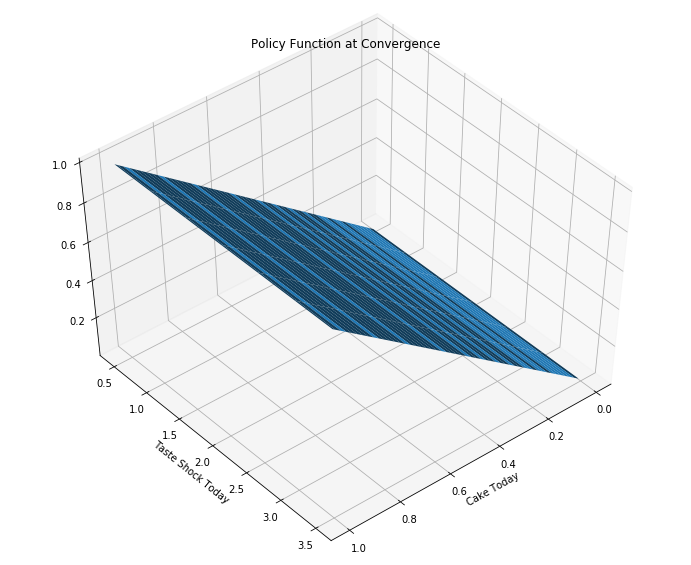

In [185]:
from mpl_toolkits.mplot3d import Axes3D
x,y = np.meshgrid(w_vec, e_vec)
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x.T, y.T, w_prime)
ax.set_xlabel('Cake Today')
ax.set_ylabel('Taste Shock Today')
ax.set_title("Policy Function at Convergence")
ax.view_init(elev = 50, azim = 50)